In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline


# Import Train and Test Data
train_data = pd.read_csv("train_final_clean_df.csv")
train_data.head(2)


,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,language,city,age,gender,registered_via,target,age_group
0,explore,Explore,online-playlist,206471.0,359,Bastille,Dan Smith| Mark Crew,52.0,1,0,Unknown,7,1,0
1,my library,Local playlist more,local-playlist,284584.0,1259,Various Artists,Unknown,52.0,13,24,female,9,1,1


In [10]:
train = pd.read_csv('data/train.csv')
songs = pd.read_csv('data/songs.csv')
test = pd.read_csv('data/test.csv')

In [11]:
print('Song stats: ')
songs_in_train_and_test = np.intersect1d(train['song_id'].unique(), test['song_id'].unique())
print(train['song_id'].nunique(), test['song_id'].nunique())
print((test['song_id'].nunique() - songs_in_train_and_test.shape[0]))
print((test['song_id'].nunique() - songs_in_train_and_test.shape[0]) / test['song_id'].nunique())

print('User stats: ')
users_in_train_and_test = np.intersect1d(train['msno'].unique(), test['msno'].unique())
print(train['msno'].nunique(), test['msno'].nunique())
print((test['msno'].nunique() - users_in_train_and_test.shape[0]))
print((test['msno'].nunique() - users_in_train_and_test.shape[0]) / test['msno'].nunique())

train_merged = train.merge(songs[['song_id', 'artist_name', 'genre_ids',
                                       'language']], on='song_id')
test_merged = test.merge(songs[['song_id', 'artist_name', 'genre_ids',
                                     'language']], on='song_id')

print('Artists stats: ')
artists_in_train_and_test = np.intersect1d(train_merged['artist_name'].unique(),
                                           test_merged['artist_name'].unique())
print(train_merged['artist_name'].nunique(), test_merged['artist_name'].nunique())
print((test_merged['artist_name'].nunique() - artists_in_train_and_test.shape[0]))
print((test_merged['artist_name'].nunique()
       - artists_in_train_and_test.shape[0]) / test_merged['artist_name'].nunique())

print('Language stats: ')
langs_in_train_and_test = np.intersect1d(train_merged['language'].unique(),
                                          test_merged['language'].unique())
print(train_merged['language'].nunique(), test_merged['language'].nunique())
print((test_merged['language'].nunique() - langs_in_train_and_test.shape[0]))
print((test_merged['language'].nunique()
       - langs_in_train_and_test.shape[0]) / test_merged['language'].nunique())

print('Genre stats: ')
genres_in_train_and_test = np.intersect1d(train_merged['genre_ids'].apply(str).unique(),
                                          test_merged['genre_ids'].apply(str).unique())
print(train_merged['genre_ids'].nunique(), test_merged['genre_ids'].nunique())
print((test_merged['genre_ids'].nunique() - genres_in_train_and_test.shape[0]))
print((test_merged['genre_ids'].nunique()
       - genres_in_train_and_test.shape[0]) / test_merged['genre_ids'].nunique())

Song stats: 
359966 224753
59873
0.2663946643648806
User stats: 
30755 25131
3648
0.14515936492777845
Artists stats: 
40582 27563
5790
0.21006421652214927
Language stats: 
10 10
0
0.0
Genre stats: 
572 501
35
0.06986027944111776


We have 359966 different songs in the train set and 224753 different songs in the test set.
Also, 59873 of the songs in the test set do no appear in the train set - that is 26.64 % of the test set size.
30755 unique users in the train set and 25131 unique users in the test set; () of the users which are in the test set do no appear in the train set - that is 14.52 % of the test set size.
The songs in the train set have been performed by 40582 different artists, the songs in the test set have been performed by 27563 different artists; 5790 of the artists which are in the test set do not appear in the train set - 21 % of the test set's artists do not appear in the training data.
The songs are in 10 different languages, and all the languages are represented equally across the train and test sets.
The songs in the train set have 572 different genres, while the songs in the test set have 501 different genres; 35 of the genres in the test set do not appear in the train set, which makes up 7% of the test set's genres.

    IMPORTANT NOTE: Song can have multiple genres, and that currently is considered as a genre in itself, since we don't do any preprocessing of the "genre_ids" columns; so if song1 in the train set has genre "1" and song2 in the train set has genre "2", and song3 in the test set has genre "1|2" (which means it is both in genre "1" and "2"), this is currently computed as if the genre of song3 does not appear in the train set. So the real number of genres is probably much smaller, and probably the number of genres in the test set that don't appear in the train set is smaller too (I'm actually hoping it's 0). A bit later we'll do some processing of the genre data and re-compute this statistic.

In [12]:
listen_log = train[['msno','song_id','target']].merge(songs,on='song_id')

listen_log_groupby = listen_log[['song_id', 'target']].groupby(['song_id']).agg(['mean',
                                                                                 'count'])
listen_log_groupby.reset_index(inplace=True)
listen_log_groupby.columns = list(map(''.join, listen_log_groupby.columns.values))
listen_log_groupby.columns = ['song_id', 'repeat_play_chance', 'plays']  #rename columns

song_data = listen_log_groupby.merge(songs, on='song_id') # merge song data with computed values

song_data['repeat_events'] = song_data['repeat_play_chance'] * song_data['plays']

In [13]:
song_data['plays'].max()

13973

In [15]:
#How does a songs popularity (number of plays) affect the chance of it being played repeatedly?
# song_plays_gb = song_data[['plays', 'repeat_events']].groupby(['plays', 'repeat_events'])
#OK, this can probably be done using groupby's, but I'm too tired to think of a proper way to do
# this

x_plays = []
y_repeat_chance = []

for i in range(1,song_data['plays'].max()+1):
    plays_i = song_data[song_data['plays']==i]
    count = plays_i['plays'].sum()
    if count > 0:
        x_plays.append(i)
        y_repeat_chance.append(plays_i['repeat_events'].sum() / count)


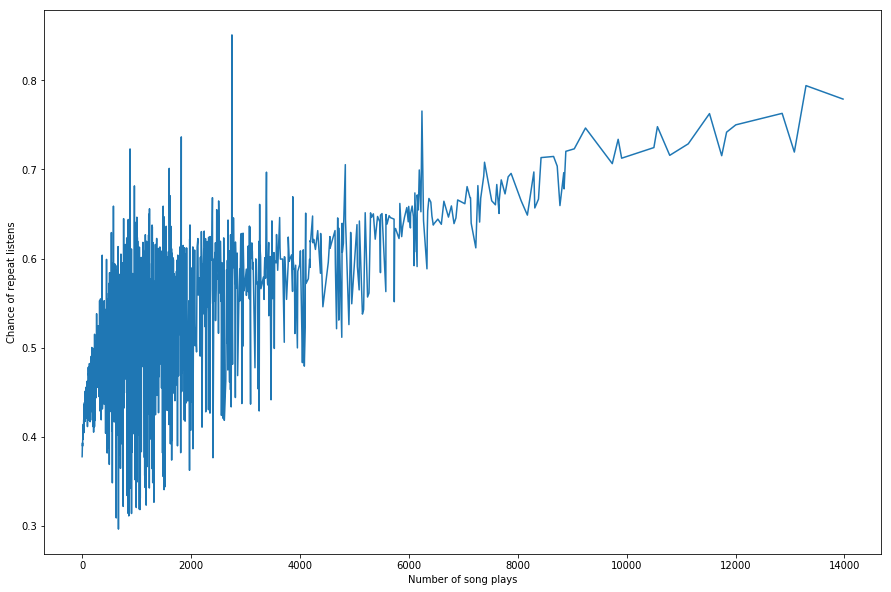

In [16]:
f,axarray = plt.subplots(1,1,figsize=(15,10))
plt.xlabel('Number of song plays')
plt.ylabel('Chance of repeat listens')
plt.plot(x_plays, y_repeat_chance)

So, looks like there is some correlation between these two numbers (albeit noisy, which might be due to a not very large amount of songs with a specific (large) number of plays)

In [17]:
def count_vals(x):
    # count number of values (since we can have mutliple values separated by '|')
    if type(x) != str:
        return 1
    else:
        return 1 + x.count('|')

In [18]:
# count number of genres, composers, lyricsts
song_data['number_of_genres'] = song_data['genre_ids'].apply(count_vals)
song_data['number_of_composers'] = song_data['composer'].apply(count_vals)
song_data['number_of_lyricists'] = song_data['lyricist'].apply(count_vals)

In [19]:
n_genres_max = song_data['number_of_genres'].max()
n_composers_max = song_data['number_of_composers'].max()
n_lyricists_max = song_data['number_of_lyricists'].max()

print(n_genres_max, n_composers_max, n_lyricists_max)


8 51 23


Holy hell, 51 composers? 23 lyricists? Let's check out what kind of songs are those, and then move on and take a closer look how the songs are distributed according to these variables (# of genres/composers/lyricists). Also, we'll look how the number of genres/composers/lyricists affects the the chances of a song being played again.

In [20]:
max_comp_song = song_data.iloc[song_data['number_of_composers'].idxmax()]
max_lyr_song = song_data.iloc[song_data['number_of_lyricists'].idxmax()]
pd.set_option('display.max_colwidth', 200)
print(max_comp_song[['artist_name', 'composer', 'lyricist', 'number_of_composers',
                     'number_of_lyricists']], '\n')
print(max_lyr_song[['artist_name', 'composer', 'lyricist', 'number_of_composers',
                    'number_of_lyricists']])

artist_name                                                                                                                                                                                                             SHINee
composer               Korean Lyrics by Kim| Jong Hyun (12.5%) Harvey Mason| Jr. / Steven,,31\nw1zMqFE+5ynBzZil7EKEh2HvNHDLNvnlQ+al7cRBqjw=,281913,465,Madonna,,,52\nRcGEZpOfi+Y9D7JIIcUtyGP2MddfnhVzhfKKhEAJAtM=,210372,20...
lyricist                                                                                                                                                                                Andreas "Quiz" Romdhane| Savan Kotecha
number_of_composers                                                                                                                                                                                                         51
number_of_lyricists                                                                                         

In [21]:
x_genres = list(range(1,n_genres_max+1))
x_composers = list(range(1,n_composers_max+1))
x_lyricists = list(range(1,n_lyricists_max+1))

y_genres = [song_data[song_data['number_of_genres'] == x].shape[0] for x in x_genres]
y_composers = [song_data[song_data['number_of_composers'] == x].shape[0] for x in x_composers]
y_lyricists = [song_data[song_data['number_of_lyricists'] == x].shape[0] for x in x_lyricists]


# now, we get some zero values for the # of composers and # lyricists, lets get rid of them
empty_ids = [i for i, y in enumerate(y_composers) if y == 0]
x_composers_fixed = [x_composers[i] for i in range(0,n_composers_max) if i not in empty_ids]
y_composers_fixed = [y_composers[i-1] for i in x_composers_fixed]

empty_ids = [i for i, y in enumerate(y_lyricists) if y == 0]
x_lyricists_fixed = [x_lyricists[i] for i in range(0,n_lyricists_max) if i not in empty_ids]
y_lyricists_fixed = [y_lyricists[i-1] for i in x_lyricists_fixed]

y_repeat_chance_g = []
y_plays_g = []

for i in range(1,n_genres_max+1):
    genres_i = song_data[song_data['number_of_genres']==i]
    count = genres_i['plays'].sum()
    y_repeat_chance_g.append(genres_i['repeat_events'].sum() / count)
    y_plays_g.append(count)
    
y_repeat_chance_c = []
y_plays_c = []

for i in x_composers_fixed:
    composers_i = song_data[song_data['number_of_composers']==i]
    count = composers_i['plays'].sum()
    y_repeat_chance_c.append(composers_i['repeat_events'].sum() / count)
    y_plays_c.append(count)
    
y_repeat_chance_l = []
y_plays_l = []

for i in x_lyricists_fixed:
    lyricists_i = song_data[song_data['number_of_lyricists']==i]
    count = lyricists_i['plays'].sum()
    y_repeat_chance_l.append(lyricists_i['repeat_events'].sum() / count)
    y_plays_l.append(count)

Text(0.5, 0, '# of lyricists')

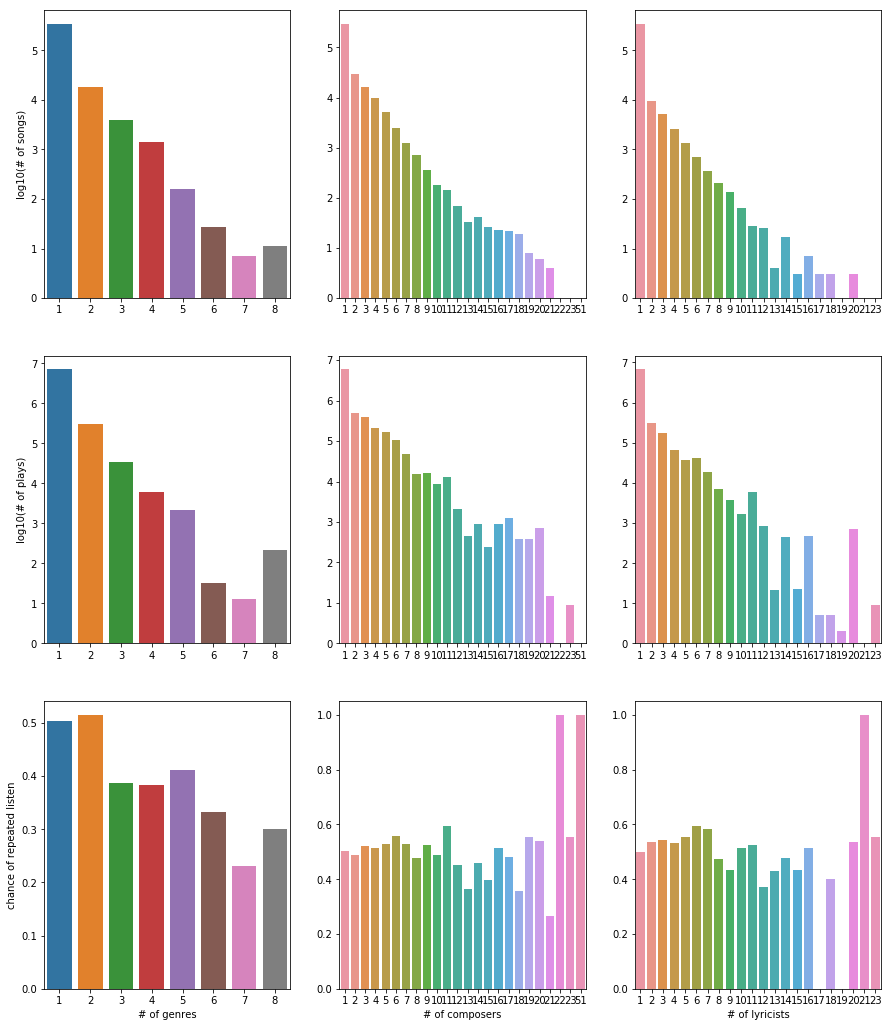

In [22]:
fig = plt.figure(figsize=(15, 18)) 

ax331 = plt.subplot(3,3,1)
sns.barplot(x=x_genres,y=np.log10(y_genres))
ax331.set_ylabel('log10(# of songs)')
ax334 = plt.subplot(3,3,4)
sns.barplot(x=x_genres,y=np.log10(y_plays_g))
ax334.set_ylabel('log10(# of plays)')
ax337 = plt.subplot(3,3,7)
sns.barplot(x=x_genres,y=y_repeat_chance_g)
ax337.set_xlabel('# of genres')
ax337.set_ylabel('chance of repeated listen')

plt.subplot(3,3,2)
sns.barplot(x=x_composers_fixed,y=np.log10(y_composers_fixed))
plt.subplot(3,3,5)
sns.barplot(x=x_composers_fixed,y=np.log10(y_plays_c))
ax338 = plt.subplot(3,3,8)
sns.barplot(x=x_composers_fixed,y=y_repeat_chance_c)
ax338.set_xlabel('# of composers')


plt.subplot(3,3,3)
sns.barplot(x=x_lyricists_fixed,y=np.log10(y_lyricists_fixed))
plt.subplot(3,3,6)
sns.barplot(x=x_lyricists_fixed,y=np.log10(y_plays_l))
ax339 = plt.subplot(3,3,9)
sns.barplot(x=x_lyricists_fixed,y=y_repeat_chance_l)
ax339.set_xlabel('# of lyricists')

So it seems there's no real effect of the number of composers and lyricists on the song's repeat listens; the number of genres seems to have an influence. Also, there's more than a 1000 songs with 5 lyricists (and there's a thousand of songs with 7 composers). Also, those songs with 15+ composers seem (relatively) popular – nearly a 1000 plays for less than 10 songs (looking at the songs with 20 composers). The same for the song with 20 lyricists. (Actually, the data on composers/lyricists seems a bit noisy - there are some weirdly placed delimiters here and there; but the overall impression is that it has no influence on the chance of a repeated listen anyway). What about the song's language, how does that influence a songs plays and chance of repeated listens?

In [24]:
languages = song_data['language'].unique()
print(languages.shape[0])

language_count = []
language_plays = []
language_repeat_chance = []

for l in languages:
    if not np.isnan(l):
        songs_with_language = song_data[song_data['language']==l]
        count = songs_with_language['plays'].sum()
        language_repeat_chance.append(songs_with_language['repeat_events'].sum() / count)
        language_count.append(songs_with_language.shape[0])
        language_plays.append(count)
    else:
        songs_with_language = song_data[pd.isnull(song_data['language'])]
        count = songs_with_language['plays'].sum()
        language_repeat_chance.append(songs_with_language['repeat_events'].sum() / count)
        language_count.append(songs_with_language.shape[0])
        language_plays.append(count)
        
languages[10] = -100  # we'll replace the nan value with something different

11


OK, 10 different languages (since one of the values is actually NaN)

Text(0.5, 0, 'Song language')

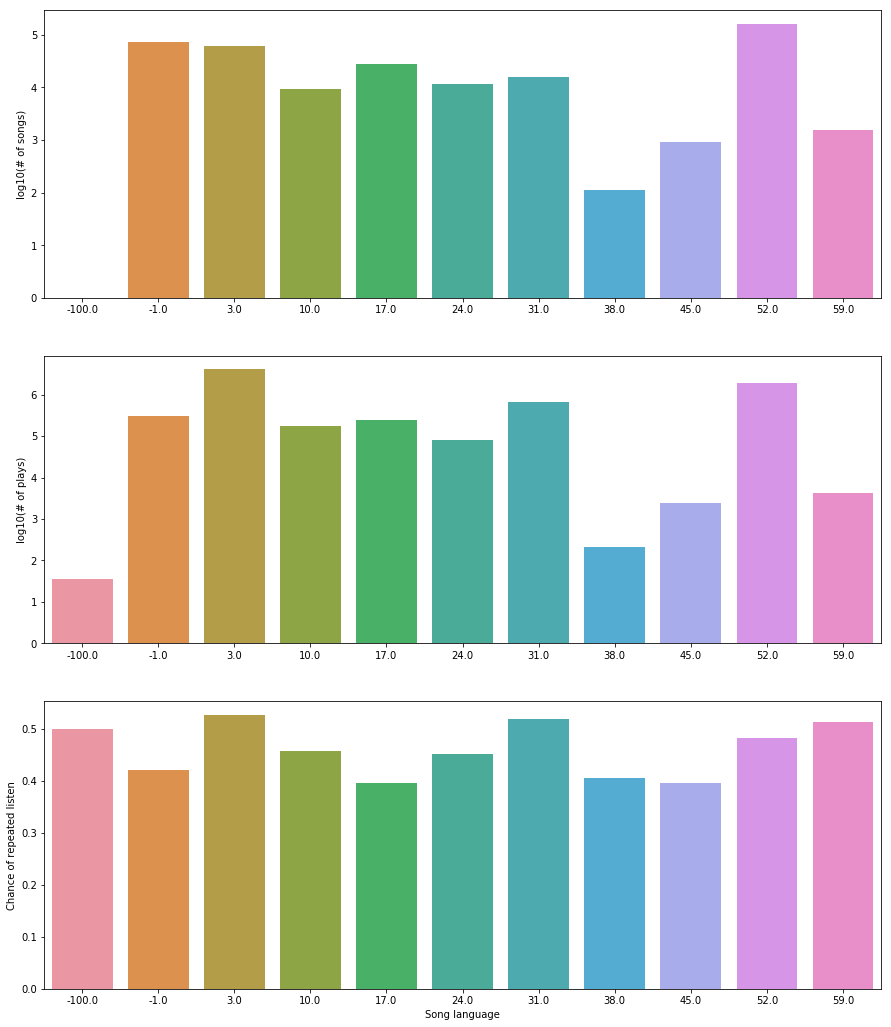

In [25]:
fig = plt.figure(figsize=(15, 18)) 

ax1 = plt.subplot(3,1,1)
sns.barplot(x=languages,y=np.log10(language_count))
ax1.set_ylabel('log10(# of songs)')
ax2 = plt.subplot(3,1,2)
sns.barplot(x=languages,y=np.log10(language_plays))
ax2.set_ylabel('log10(# of plays)')
ax3 = plt.subplot(3,1,3)
sns.barplot(x=languages,y=language_repeat_chance)
ax3.set_ylabel('Chance of repeated listen')
ax3.set_xlabel('Song language')

In [26]:
min_song_length_sec = song_data['song_length'].min() / 1000  # the data is in msec
max_song_length_sec = song_data['song_length'].max() / 1000
print(min_song_length_sec, max_song_length_sec)

1.393 10851.706


In [27]:
min_song_length_sec = song_data['song_length'].min() / 1000  # the data is in msec
max_song_length_sec = song_data['song_length'].max() / 1000
print(min_song_length_sec, max_song_length_sec)

1.393 10851.706


A very quick look at Trisha Yearwood's profile on Rateyourmusic showed that she's a contemporary country/pop rock singer, so her having a 1-second song seems weird. This can't be a Napalm Death cover (at least if we trust the composer data), so probably it's just bad data? Or some weird abruptly cut-off file?

As for Jason Stephenson, a Google search tells me he writes music for deep meditation/deep sleep/relaxation/etc., so a 3-hour composition is not that surprising after all.

So, how are the songs distributed length-wise?

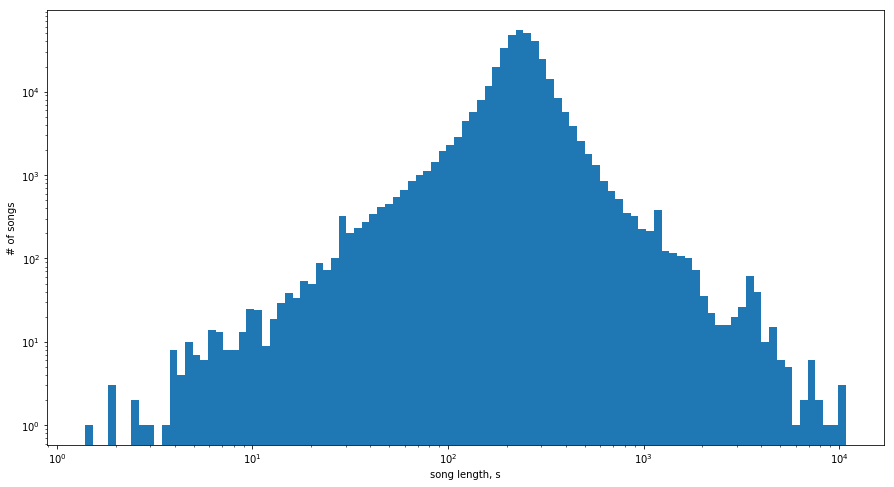

In [28]:
plt.figure(figsize=(15,8))
length_bins = np.logspace(np.log10(min_song_length_sec),np.log10(max_song_length_sec+1),100)
sns.distplot(song_data['song_length']/1000, bins=length_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('song length, s')
plt.ylabel('# of songs')
plt.yscale('log')
plt.xscale('log')
# song_data.hist(column='song_length', bins=100)

So there's actually quite a lot of songs longer than 1000 songs = 16 minutes. Now, how does a song's length influence the number of plays and repeated listens it receives?

Text(0, 0.5, 'Chance of repeated listen')

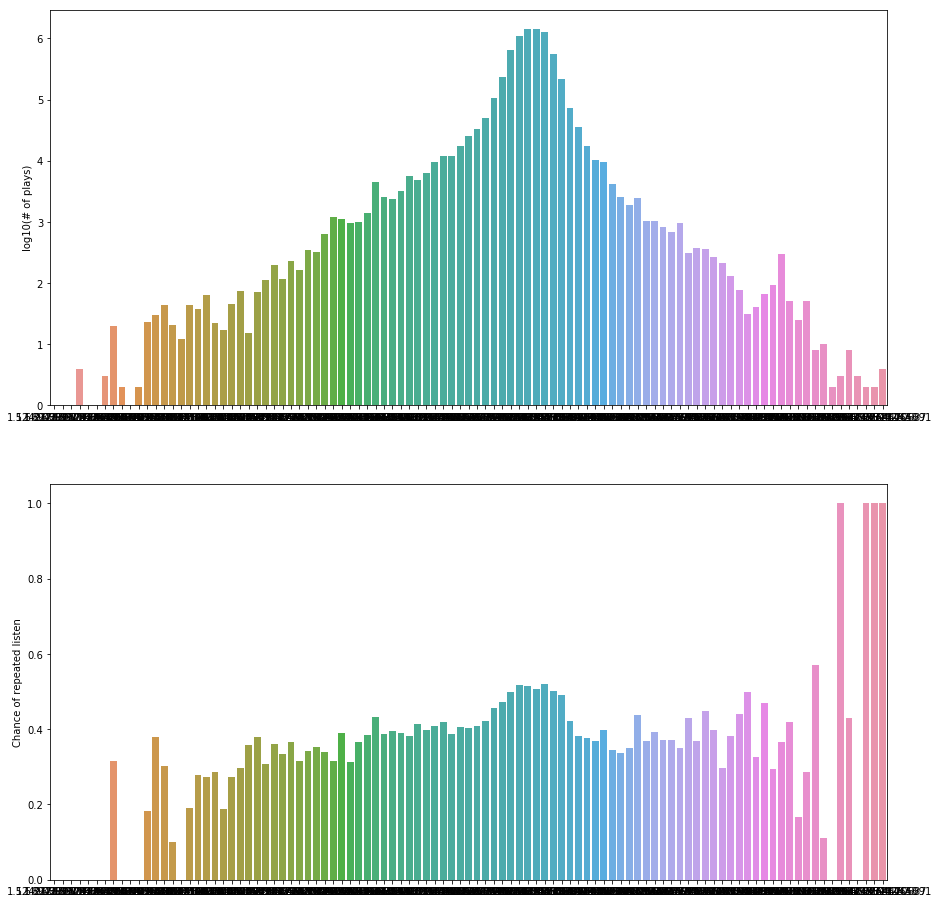

In [30]:
time_labels = list(range(length_bins.shape[0]-1))
song_data['time_cuts'] = pd.cut(song_data['song_length']/1000,
                                bins=length_bins, labels=time_labels)

y_repeat_chance_tc = []
y_plays_tc = []
y_rel_plays = []
for i in time_labels:
    timecut_i = song_data[song_data['time_cuts']==i]
    count = timecut_i['plays'].sum()
    y_plays_tc.append(count)
    if count != 0:
        y_repeat_chance_tc.append(timecut_i['repeat_events'].sum() / count)
        y_rel_plays.append(count / timecut_i.shape[0])
    else:
        y_repeat_chance_tc.append(0)
        y_rel_plays.append(0)
    
fig = plt.figure(figsize=(15, 16)) 

y_plays_tc = [yptc + 1 for yptc in y_plays_tc]  # otherwise we'll get errors when we take the log

ax211 = plt.subplot(2,1,1)
sns.barplot(x=length_bins[time_labels],y=np.log10(y_plays_tc))
ax211.set_ylabel('log10(# of plays)')

ax212 = plt.subplot(2,1,2)
sns.barplot(x=length_bins[time_labels],y=y_repeat_chance_tc)
ax212.set_ylabel('Chance of repeated listen')


 the picture is clear – shorter-than average songs get lower chances of repeated listens, while those few very long songs are always repeated (each person that has listened to that 3-hour Jason Stephenson track has listened to it again). The next question – how does an artist's number of tracks and plays influence the chance of repeated listens? First, we're going to look at the distribution of number of tracks and plays an artist has.

As for the number of listens of songs in a certain length interval – since it's correlated to the number of tracks in the same interval, it's obvious that the histograms looks nearly identical to the one showcasing the number of songs vs their time. So let's just divide the number of listens of songs in a length interval by the number of tracks in the same interval.

Text(0, 0.5, '# of plays / # of tracks')

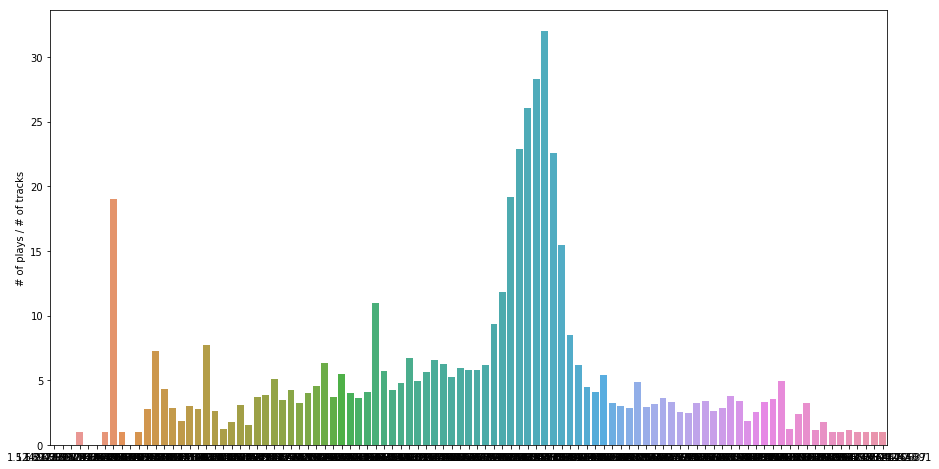

In [31]:
fig = plt.figure(figsize=(15, 8)) 

ax111 = plt.subplot(1,1,1)
sns.barplot(x=length_bins[time_labels],y=y_rel_plays)
ax111.set_ylabel('# of plays / # of tracks')

In [32]:
max_tracks = song_data['artist_name'].value_counts().max()
print(song_data['artist_name'].value_counts()[:4])

Various Artists       17080
証聲音樂圖書館 ECHO MUSIC     3997
貴族精選                   1211
霹靂布袋戲劇集原聲帶              937
Name: artist_name, dtype: int64


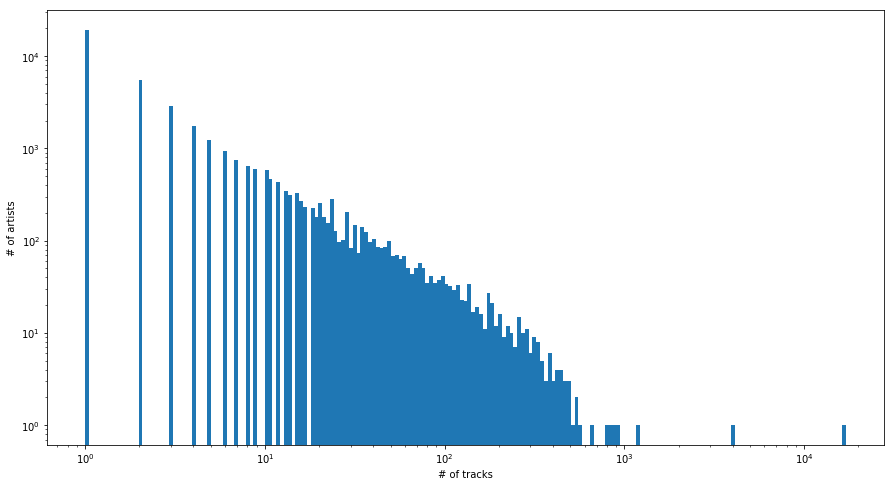

In [33]:
plt.figure(figsize=(15,8))
track_bins = np.logspace(0,np.log10(max_tracks+1),200)
# track_bins = np.linspace(1,max_tracks+1,100)
sns.distplot(song_data['artist_name'].value_counts(), bins=track_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('# of tracks')
plt.ylabel('# of artists')
plt.yscale('log')
plt.xscale('log')

A lot of artists with just one track (actually, with one track that has had at least one listen – since we've merged the train and song datasets)

In [34]:
artist_groupby = song_data[['artist_name', 'plays']].groupby(['artist_name'])
artist_plays = artist_groupby['plays'].agg(['sum'])
artist_plays.reset_index(inplace=True)

min_plays = artist_plays['sum'].min()
max_plays = artist_plays['sum'].max()
print(min_plays, max_plays)

1 303616


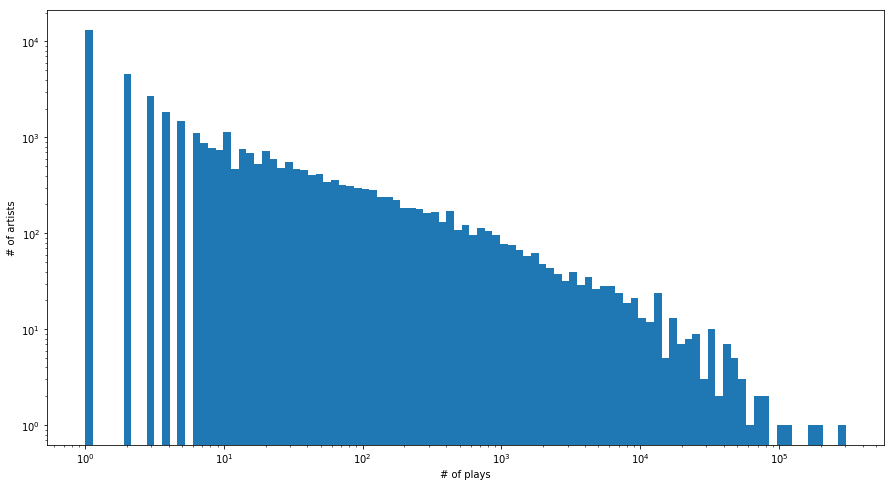

In [35]:
plt.figure(figsize=(15,8))
play_bins = np.logspace(np.log10(min_plays),np.log10(max_plays+1),100)
# track_bins = np.linspace(1,max_tracks+1,100)
sns.distplot(artist_plays['sum'], bins=play_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('# of plays')
plt.ylabel('# of artists')
plt.yscale('log')
plt.xscale('log')

So a lot of artists with just a couple of plays (the number of plays and number of tracks is an artist has is probably quite correlated). How does these variables correlate with the chance of repeated listens (as in - how does the number of songs an artist have affect the chance of his songs being played repeatedly; and how does the number of plays an artist has received affect the chance of his songs being played repeatedly).

In [36]:
artist_replgroupby = song_data[['artist_name', 'plays', 'repeat_events']].groupby(['artist_name'])
artist_replgroupby = artist_replgroupby['plays', 'repeat_events'].agg(['sum', 'count'])
artist_replgroupby.reset_index(inplace=True)
artist_replgroupby.columns = list(map(''.join, artist_replgroupby.columns.values))
artist_replgroupby.drop(['repeat_eventscount'], axis=1, inplace=True)
artist_replgroupby.columns = ['artist', 'plays', 'tracks', 'repeat_events']
artist_replgroupby['repeat_play_chance'] = artist_replgroupby['repeat_events'] / artist_replgroupby['plays']

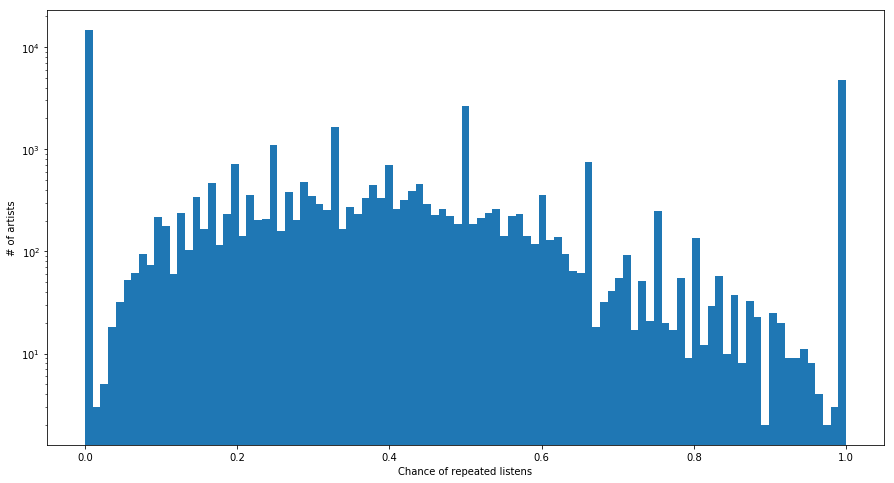

In [37]:
plt.figure(figsize=(15,8))
chance_bins = np.linspace(0,1,100)
sns.distplot(artist_replgroupby['repeat_play_chance'], bins=chance_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('Chance of repeated listens')
plt.ylabel('# of artists')
plt.yscale('log')
# plt.xscale('log')

Wow, a majority of artists don't have any repeated listens at all! And a lot of artists have a 100% chance of repeated listens.



In [38]:
artist_replgroupby['plays'].max()

303616

Text(0, 0.5, 'Chance of repeated listen')

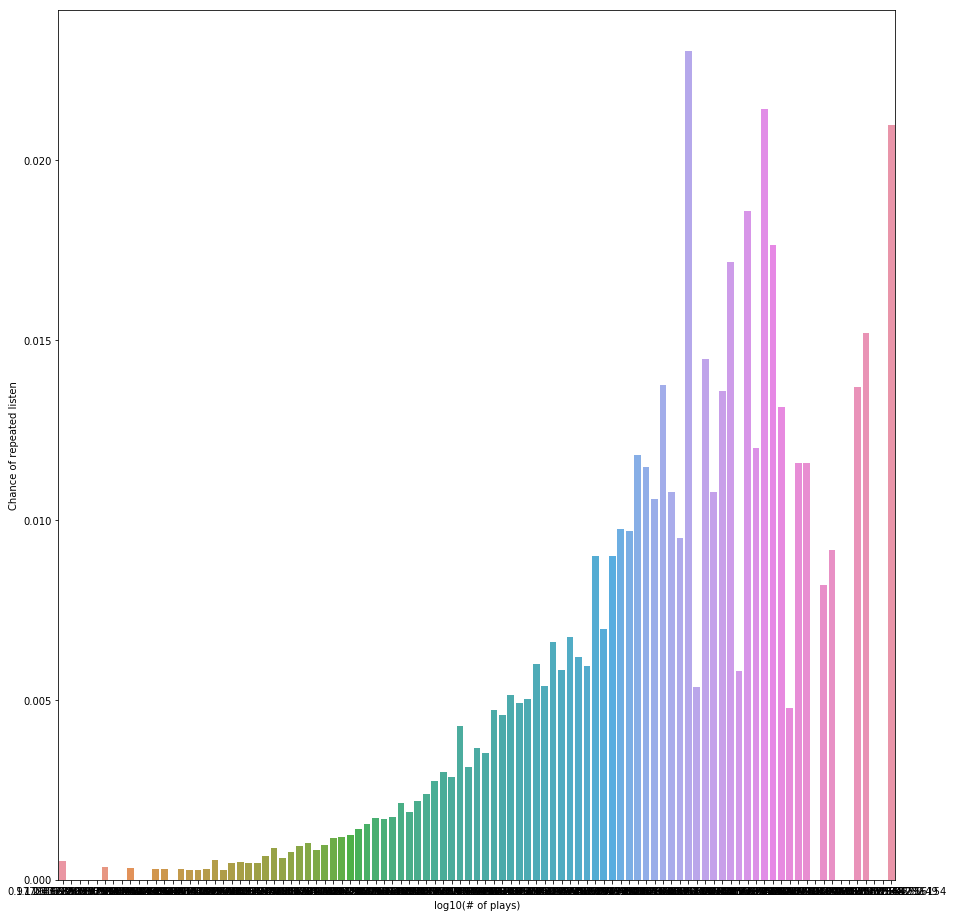

In [39]:
play_bins = np.logspace(-0.01, np.log10(artist_replgroupby['plays'].max()), 100)
play_labels = list(range(play_bins.shape[0]-1))
artist_replgroupby['play_cuts'] = pd.cut(artist_replgroupby['plays'],
                                         bins=play_bins, labels=play_labels)

y_repeat_chance_p = []
y_plays_p = []
for i in play_labels:
    playcut_i = artist_replgroupby[artist_replgroupby['play_cuts']==i]
    count = artist_replgroupby['plays'].sum()
    y_plays_p.append(count)
    if count != 0:
        y_repeat_chance_p.append(playcut_i['repeat_events'].sum() / count)
    else:
        y_repeat_chance_p.append(0)
    
fig = plt.figure(figsize=(15, 16)) 

ax111 = plt.subplot(1,1,1)
sns.barplot(x=play_bins[play_labels],y=y_repeat_chance_p)
ax111.set_xlabel('log10(# of plays)')
ax111.set_ylabel('Chance of repeated listen')

So it looks like artists with a lower number of plays also have a lower chance of repeated listens, whereas when the number of plays increases, the data behaves more erratically.

Text(0, 0.5, 'Chance of repeated listen')

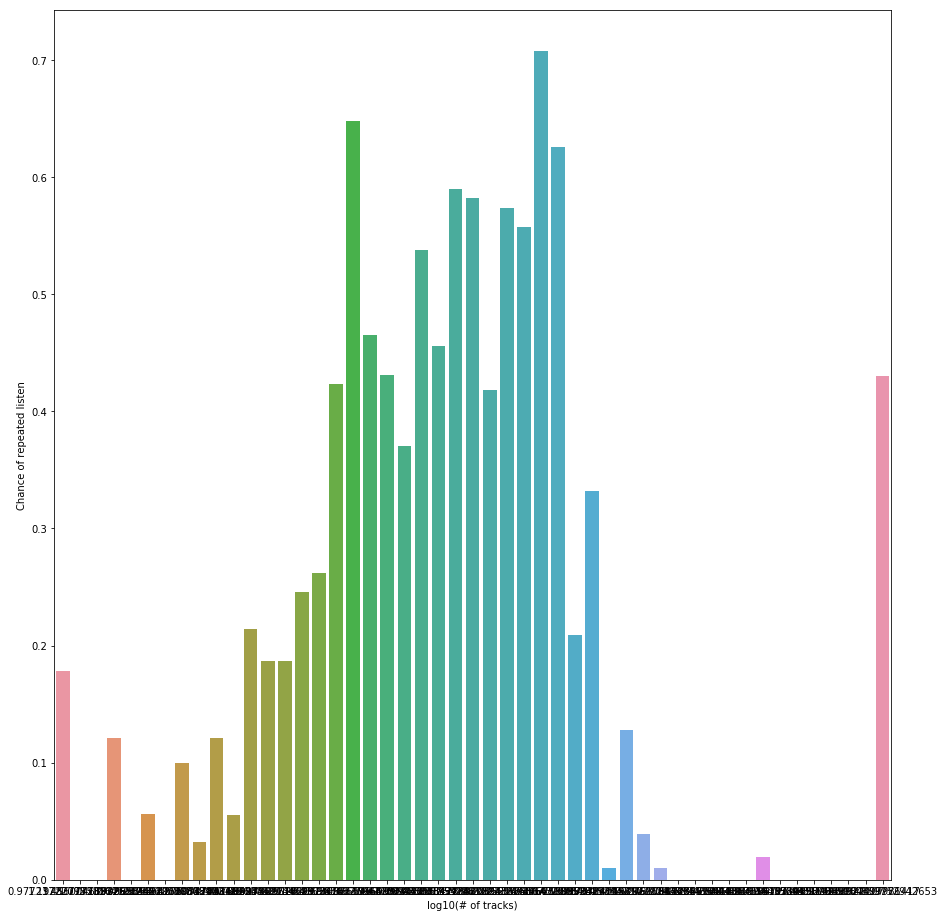

In [40]:
track_bins = np.logspace(-0.01, np.log10(artist_replgroupby['tracks'].max()), 50)
track_labels = list(range(track_bins.shape[0]-1))
artist_replgroupby['track_cuts'] = pd.cut(artist_replgroupby['tracks'],
                                          bins=track_bins, labels=track_labels)

y_repeat_chance_t = []
y_tracks_t = []
for i in track_labels:
    trackcut_i = artist_replgroupby[artist_replgroupby['track_cuts']==i]
    count = artist_replgroupby['tracks'].sum()
    y_tracks_t.append(count)
    if count != 0:
        y_repeat_chance_t.append(trackcut_i['repeat_events'].sum() / count)
    else:
        y_repeat_chance_t.append(0)
    
fig = plt.figure(figsize=(15, 16)) 

ax111 = plt.subplot(1,1,1)
sns.barplot(x=track_bins[track_labels],y=y_repeat_chance_t)
ax111.set_xlabel('log10(# of tracks)')
ax111.set_ylabel('Chance of repeated listen')

So seems like there's a lot of variance – some artists with a low number of tracks have a high replay chance, other's dont. And there's "Various Artists", of course, which have the largest number of tracks but cannot be representative, of course. But in general, a very low number of tracks leads to a lower replay chance.

So, what about the number of languages an artists writes songs in, does that affect anything?

In [41]:
artist_langgroupby = song_data[['artist_name',  'language']].groupby(['artist_name'])
artist_langgroupby = artist_langgroupby.agg({"language": pd.Series.nunique})
artist_langgroupby.reset_index(inplace=True)
artist_langgroupby.columns = list(map(''.join, artist_langgroupby.columns.values))
artist_langgroupby.columns = ['artist', 'language']

artist_repl_lang = artist_replgroupby.merge(artist_langgroupby, on='artist')

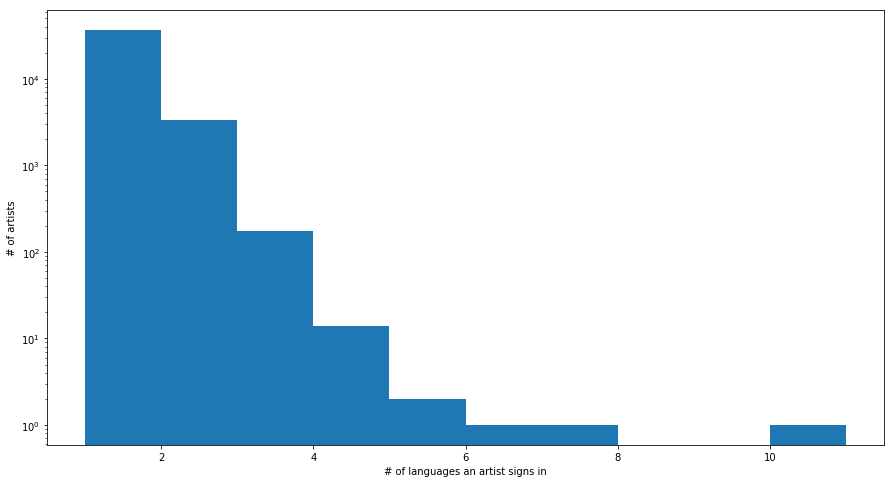

In [42]:
plt.figure(figsize=(15,8))
chance_bins = np.linspace(1,artist_repl_lang['language'].max()+1,11)
sns.distplot(artist_repl_lang['language'], bins=chance_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('# of languages an artist signs in')
plt.ylabel('# of artists')
plt.yscale('log')

Text(0, 0.5, 'Chance of Repeated listen')

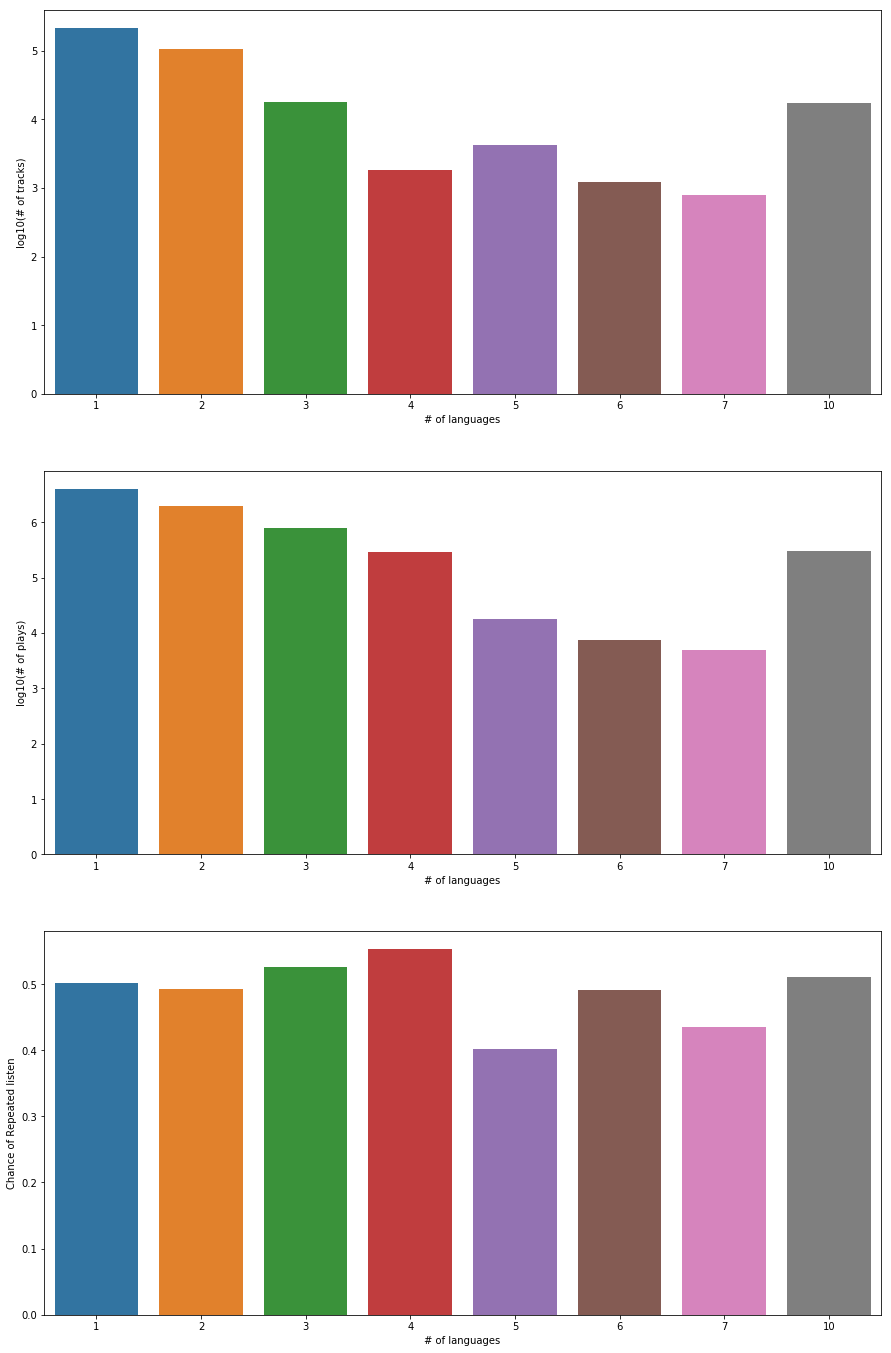

In [43]:
y_repeat_chance_l = []
y_plays_l = []
y_tracks_l = []

max_l = int(artist_repl_lang['language'].max())
l_list = []

for i in range(1,max_l+1):
    arlang = artist_repl_lang[artist_repl_lang['language']==i]
    count = arlang['plays'].sum()
    if count != 0:
        y_tracks_l.append(arlang['tracks'].sum())
        y_plays_l.append(count)
        l_list.append(i)
        y_repeat_chance_l.append(arlang['repeat_events'].sum() / count)
    
fig = plt.figure(figsize=(15, 24)) 

ax311 = plt.subplot(3,1,1)
sns.barplot(x=l_list,y=np.log10(y_tracks_l))
ax311.set_xlabel('# of languages')
ax311.set_ylabel('log10(# of tracks)')

ax312 = plt.subplot(3,1,2)
sns.barplot(x=l_list,y=np.log10(y_plays_l))
ax312.set_xlabel('# of languages')
ax312.set_ylabel('log10(# of plays)')

ax313 = plt.subplot(3,1,3)
sns.barplot(x=l_list,y=y_repeat_chance_l)
ax313.set_xlabel('# of languages')
ax313.set_ylabel('Chance of Repeated listen')


So there's more than a 1000 artists that sing in 2 languages, and more than 100 that sing in 3 languages.

But what's more interesting, is that there's not a lot of artists who sing in 4+ languages, but they do get a lot of plays. Also, those few artists who sing in 5 languages exactly, they do seem to have a lower replay chance.

Side thought: perhaps it can be a good idea in the future to split "Various Artists" in 10 separate artists based on the language of the songs (or maybe do the same based on the number of genres. Or perhaps split them based on composer/lyricist. Probably all these approaches are worth trying, given that Various Artists account for a lot of the tracks).

Finally, let's look at the genres. First of all, we have to split the genre data for songs with multiple genres. Since the maximum number of genres a song has is 8, we can just add 8 new columns ('genre_1', 'genre_2', etc.) and fill them with the genres (songs with less than 8 genres will have NaN values, obviously).

In [44]:
def split_genres(x, n):
    # n is the number of the genre
    if type(x) != str:
        if n == 1:
            if not np.isnan(x):
                return int(x)
            else:
                return x
    else:
        if x.count('|') >= n-1:
            return int(x.split('|')[n-1])

In [45]:
max_genres = song_data['number_of_genres'].max()

for i in range(1,max_genres+1):
    sp_g = lambda x: split_genres(x, i)
    song_data['genre_'+str(i)] = song_data['genre_ids'].apply(sp_g)
    
n_genres = set()

for i in range(1,max_genres+1):
    n_genres.update(song_data['genre_'+str(i)][song_data['genre_'+str(i)].notnull()].unique().tolist())

In [46]:
len(n_genres), song_data['genre_ids'].isnull().sum()

(166, 7233)

So there's actually just 166 different genres (plus 7233 songs don't have genre information; so there's 166 genres+a "NaN genre").

Let's see how the songs are distributed according to genre (the plot will probably be a bit messy, but hopefully, informative enough). Also, like before, we'll look at the # of plays divided by the # of tracks (since the two variable are correlated).

In [47]:
genres_plays = [0] * (len(n_genres) + 1)
genres_tracks = [0] * (len(n_genres) + 1)
genres_replays = [0] * (len(n_genres) + 1)

for i in range(1,max_genres+1):
    notnull_data = song_data[song_data['genre_'+str(i)].notnull()]
    for j, k in enumerate(n_genres):
        jk_sdata = notnull_data[notnull_data['genre_'+str(i)] == k]
        genres_plays[j] += jk_sdata['plays'].sum()
        genres_tracks[j] += jk_sdata['plays'].shape[0]
        genres_replays[j] += jk_sdata['repeat_events'].sum()

null_genre_data = song_data[song_data['genre_1'].isnull()]
genres_plays[len(n_genres)] = null_genre_data['plays'].sum()
genres_tracks[len(n_genres)] = null_genre_data['plays'].shape[0]
genres_replays[len(n_genres)] = null_genre_data['repeat_events'].sum()

genres_rel_plays = [x/y for x, y in zip(genres_plays, genres_tracks)]
genres_repl_chance = [x/y for x, y in zip(genres_replays, genres_plays)]

Text(0, 0.5, 'Chance of repeat listen')

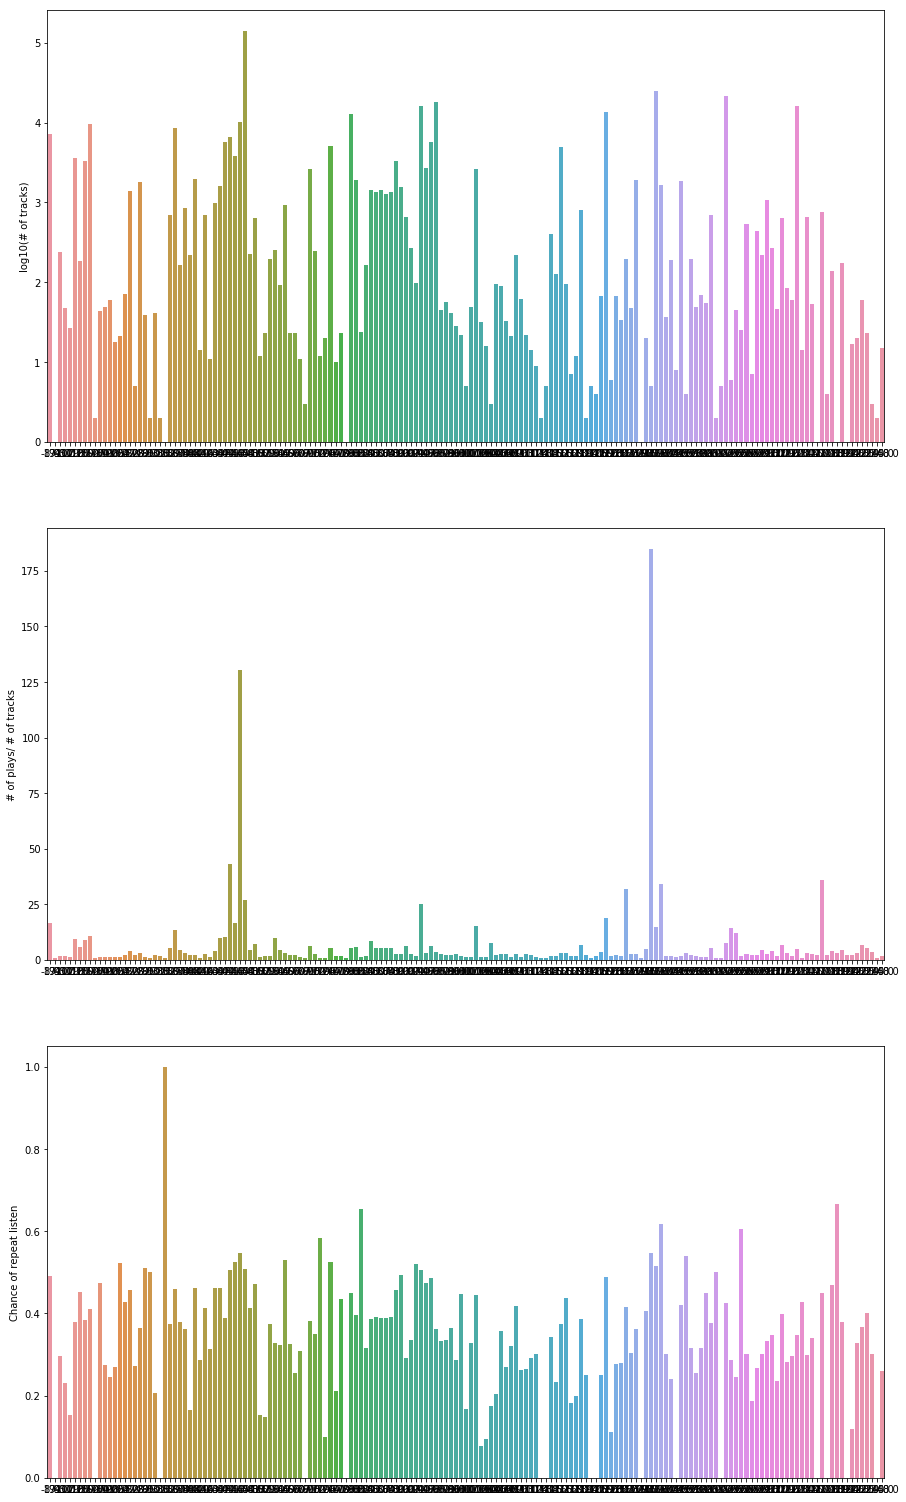

In [48]:
n_g_l = [x for x in n_genres]
n_g_l.append(-1)

fig = plt.figure(figsize=(15, 27)) 

ax411 = plt.subplot(3,1,1)
sns.barplot(x=n_g_l,y=np.log10(genres_tracks))
ax411.set_ylabel('log10(# of tracks)')


ax413 = plt.subplot(3,1,2)
sns.barplot(x=n_g_l,y=genres_rel_plays)
ax413.set_ylabel('# of plays/ # of tracks')

ax414 = plt.subplot(3,1,3)
sns.barplot(x=n_g_l,y=genres_repl_chance)
ax414.set_ylabel('Chance of repeat listen')

Text(0, 0.5, 'log10(# of plays)')

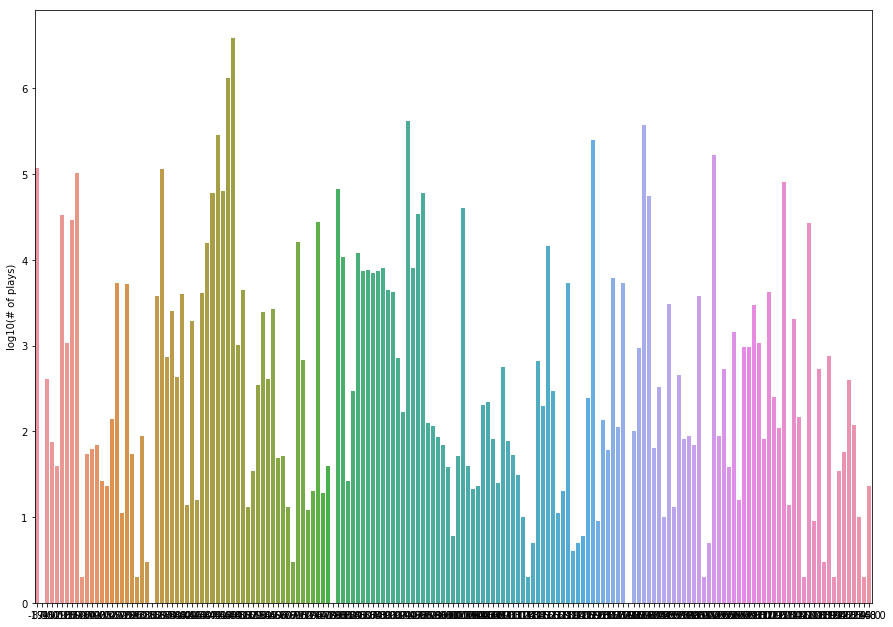

In [49]:
fig = plt.figure(figsize=(15, 24))

ax412 = plt.subplot(2,1,1)
sns.barplot(x=n_g_l,y=np.log10(genres_plays))
ax412.set_ylabel('log10(# of plays)')